# Timesfm Usage Example

## Loading Timesfm Model

In [2]:
import numpy as np

from samay.model import TimesfmModel
from samay.dataset import TimesfmDataset

from samay.model import TimesfmModel
from samay.dataset import TimesfmDataset
from samay.utils import load_args

repo = "google/timesfm-1.0-200m-pytorch"
config = {
    "context_len": 512,
    "horizon_len": 192,
    "backend": "gpu",
    "per_core_batch_size": 32,
    "input_patch_len": 32,
    "output_patch_len": 128,
    "num_layers": 20,
    "model_dims": 1280,
    "quantiles": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

tfm = TimesfmModel(config=config, repo=repo)


Using device: cuda:1


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:p-321350:t-140115981268800:timesfm_torch.py:load_from_checkpoint:Loading checkpoint from /nethome/hkamarthi3/.cache/huggingface/hub/models--google--timesfm-1.0-200m-pytorch/snapshots/0581e2c56cb06feb51cfd98fc2b4005b74f7187b/torch_model.ckpt
INFO:p-321350:t-140115981268800:timesfm_torch.py:load_from_checkpoint:Sending checkpoint to device cuda:1


## Define the datasets

In [4]:
train_dataset = TimesfmDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv', normalize=False,
                              mode='train', context_len=512, horizon_len=192)
val_dataset = TimesfmDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv', normalize=False, 
                              mode='test', context_len=512, horizon_len=192)


INFO:p-321350:t-140115981268800:data_loader.py:__init__:Data Shapes: (7, 17419), (7, 17613), (1, 17420), (1, 17420)
INFO:p-321350:t-140115981268800:data_loader.py:train_gen:Hist len: 512
INFO:p-321350:t-140115981268800:data_loader.py:__init__:Data Shapes: (7, 17419), (7, 17613), (1, 17420), (1, 17420)
INFO:p-321350:t-140115981268800:data_loader.py:test_val_gen:Hist len: 512


In [3]:
[x for x in dir(train_dataset) if "__" not in x]

['batchsize',
 'boundaries',
 'context_len',
 'data',
 'data_path',
 'dataset',
 'datetime_col',
 'freq',
 'get_data_loader',
 'horizon_len',
 'mode',
 'name',
 'normalize',
 'num_ts',
 'preprocess',
 'preprocess_eval_batch',
 'preprocess_train_batch',
 'save',
 'stride',
 'ts_cols']

`data` is of `pd.DataFrame` type and `dataset` is of `CustomTorchDataset` type

In [5]:
len(train_dataset.dataset), len(val_dataset.dataset)

(982, 18)

## Evaluate the zero-shot forecasting

In [5]:
metrics = tfm.evaluate(val_dataset)
print(metrics)

{'mse': np.float32(17.94159), 'mae': np.float32(2.2708952), 'mase': np.float32(0.55817515), 'mape': np.float32(1283.0344), 'rmse': np.float32(4.235751), 'nrmse': np.float32(0.092243955), 'smape': np.float32(0.5231085), 'msis': np.float32(0.07495749), 'nd': np.float32(0.60295093), 'mwsq': np.float32(2.145765), 'crps': np.float64(80.78891892065549)}


## Visualization of the evaluation
The following code visualises the forecast for a randomly picked `channel` and a randomly picked `time_index`

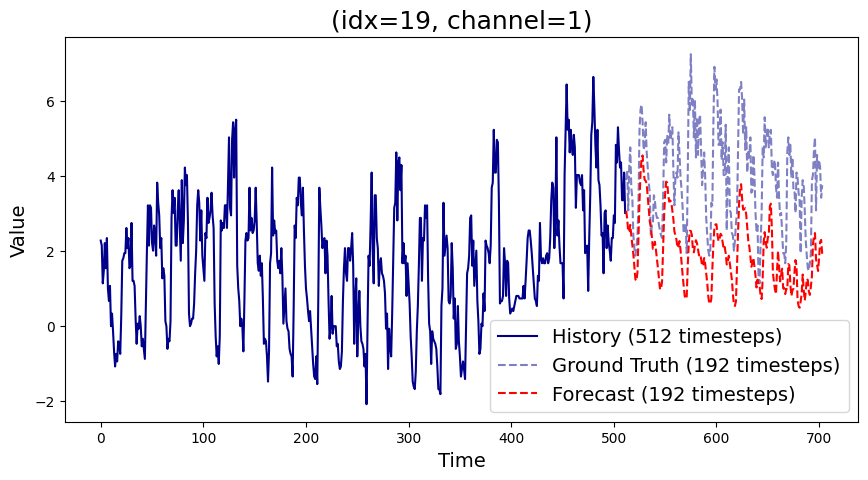

In [6]:
# import matplotlib.pyplot as plt

# # Pick a random channel and time index
# trues = np.array(trues)
# preds = np.array(preds)
# histories = np.array(histories)
# channel_idx = np.random.randint(0, trues.shape[1]) 
# time_index = np.random.randint(0, trues.shape[0]) 

# history = histories[time_index, channel_idx, :] 
# true = trues[time_index, channel_idx, :]
# pred = preds[time_index, channel_idx, :]

# plt.figure(figsize=(12, 4))

# # Plotting the first time series from history
# plt.plot(range(len(history)), history, label='History (128 timesteps)', c='darkblue')

# # Plotting ground truth and prediction
# num_forecasts = len(true)

# offset = len(history)
# plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (64 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
# plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (64 timesteps)', color='red', linestyle='--')

# plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Value', fontsize=14)
# plt.legend(fontsize=14)
# plt.show()
tfm.plot(val_dataset)

## Finetune Timesfm Model on the ETT dataset

In [7]:
finetuned_model = tfm.finetune(train_dataset)

Epoch 0, Loss: 18.90032547148899
Epoch 1, Loss: 16.19754825744625
Epoch 2, Loss: 15.175357345854346
Epoch 3, Loss: 14.39987245485812
Epoch 4, Loss: 13.903449555103935


## Test the Finetuned Model

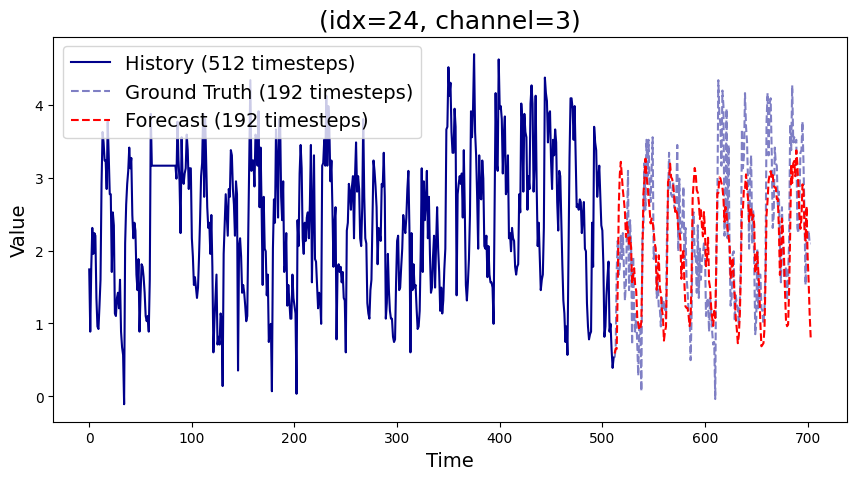

In [8]:
# avg_loss, trues, preds, histories = tfm.evaluate(val_dataset)
# print("Validation loss:", avg_loss)
tfm.plot(val_dataset)